In [1]:
import pandas as pd
data = pd.read_csv("Churn_modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [2]:
data.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# data preprocessing
print("Number of unique values: ", len(data["Geography"].unique()),'\nList of unique values: ',data["Geography"].unique())


Number of unique values:  3 
List of unique values:  ['France' 'Spain' 'Germany']


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Geography"]=le.fit_transform(data["Geography"])
print("Number of unique values : ",len(data["Geography"].unique()),'\nList of unique values:',data["Geography"].unique())

Number of unique values :  3 
List of unique values: [0 2 1]


In [7]:
print("Number of unique values: ", len(data["Gender"].unique()),'\nList of unique values: ',data["Gender"].unique())


Number of unique values:  2 
List of unique values:  ['Female' 'Male']


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Gender"]=le.fit_transform(data["Gender"])
print("Number of unique values : ",len(data["Gender"].unique()),'\nList of unique values:',data["Gender"].unique())

Number of unique values :  2 
List of unique values: [0 1]


In [9]:
print("Number of unique values: ", len(data["Surname"].unique()),'\nList of unique values: ',data["Surname"].unique())

Number of unique values:  2932 
List of unique values:  ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']


In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[2])],remainder='passthrough')
data.iloc[:,2]=np.array(ct.fit_transform(data))
data["Surname"]

0         (0, 1115)\t1.0\n  (0, 2932)\t1.0\n  (0, 2933...
1         (0, 1115)\t1.0\n  (0, 2932)\t1.0\n  (0, 2933...
2         (0, 1115)\t1.0\n  (0, 2932)\t1.0\n  (0, 2933...
3         (0, 1115)\t1.0\n  (0, 2932)\t1.0\n  (0, 2933...
4         (0, 1115)\t1.0\n  (0, 2932)\t1.0\n  (0, 2933...
                              ...                        
9995      (0, 1115)\t1.0\n  (0, 2932)\t1.0\n  (0, 2933...
9996      (0, 1115)\t1.0\n  (0, 2932)\t1.0\n  (0, 2933...
9997      (0, 1115)\t1.0\n  (0, 2932)\t1.0\n  (0, 2933...
9998      (0, 1115)\t1.0\n  (0, 2932)\t1.0\n  (0, 2933...
9999      (0, 1115)\t1.0\n  (0, 2932)\t1.0\n  (0, 2933...
Name: Surname, Length: 10000, dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int32  
 5   Gender           10000 non-null  int32  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(9), object(1)
memory usage: 1015.8+ KB


In [12]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,"(0, 1115)\t1.0\n (0, 2932)\t1.0\n (0, 2933...",619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,"(0, 1115)\t1.0\n (0, 2932)\t1.0\n (0, 2933...",608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,"(0, 1115)\t1.0\n (0, 2932)\t1.0\n (0, 2933...",502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,"(0, 1115)\t1.0\n (0, 2932)\t1.0\n (0, 2933...",699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,"(0, 1115)\t1.0\n (0, 2932)\t1.0\n (0, 2933...",850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,"(0, 1115)\t1.0\n (0, 2932)\t1.0\n (0, 2933...",771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,"(0, 1115)\t1.0\n (0, 2932)\t1.0\n (0, 2933...",516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,"(0, 1115)\t1.0\n (0, 2932)\t1.0\n (0, 2933...",709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,"(0, 1115)\t1.0\n (0, 2932)\t1.0\n (0, 2933...",772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [13]:
print(data.dtypes)


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


Column 'Surname' contains sparse data. Dropping it.


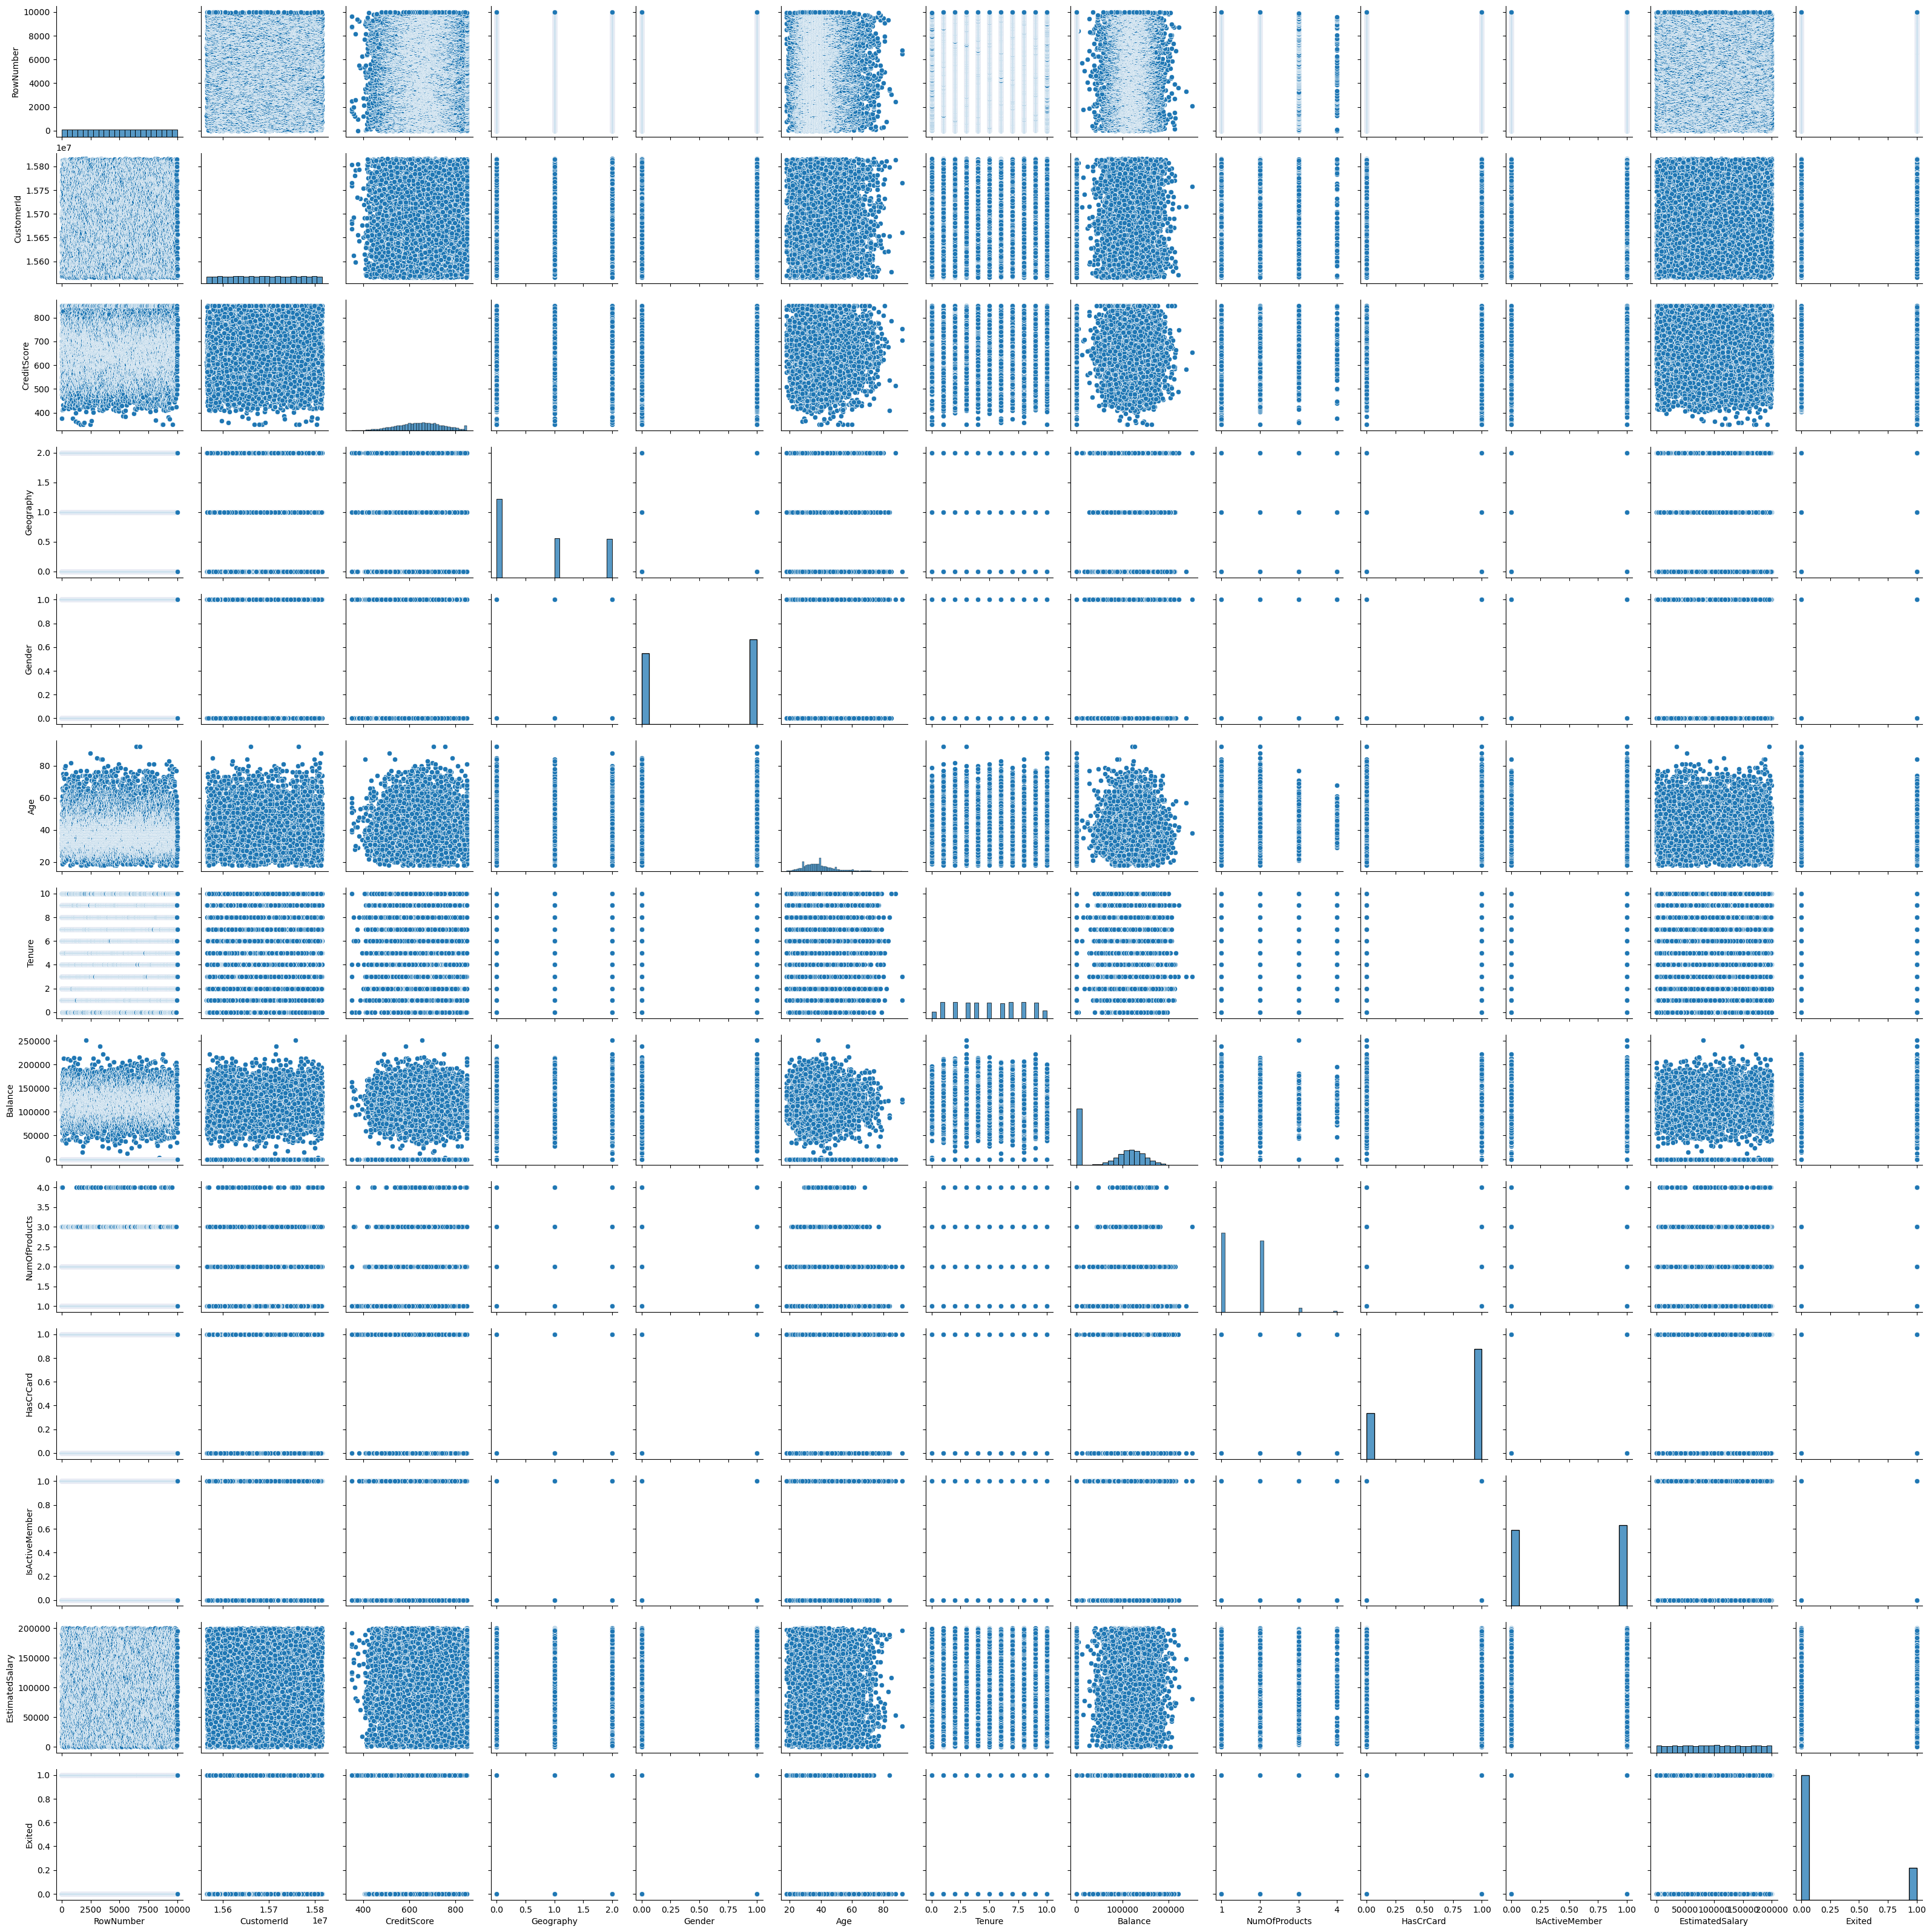

In [20]:
# Feature Extraction 
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.pairplot(data)
# plt.show()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.sparse import issparse

# Step 1: Identify and remove sparse matrix columns
for col in data.columns:
    if data[col].apply(lambda x: issparse(x)).any():
        print(f"Column '{col}' contains sparse data. Dropping it.")
        data = data.drop(columns=[col])

# Step 2: Keep only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Step 3: Plot the numeric data
sns.pairplot(numeric_data)
plt.show()


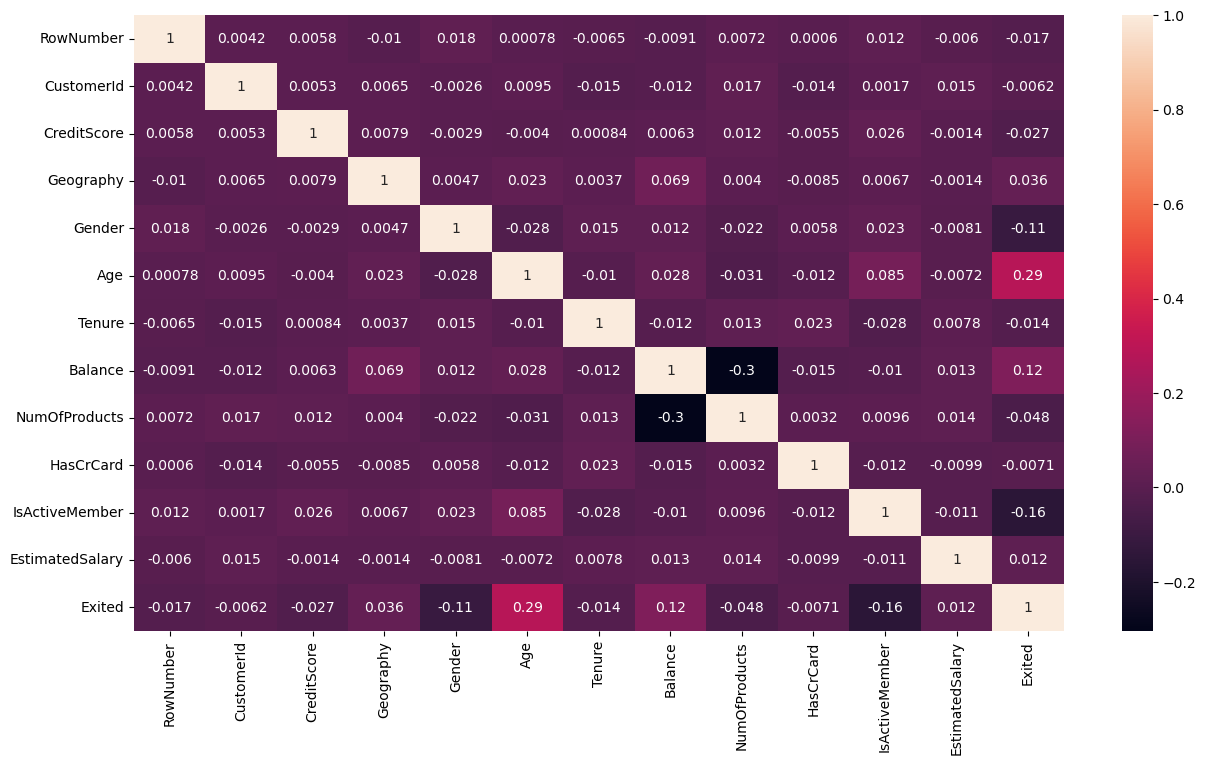

In [21]:
import warnings 
warnings.filterwarnings("ignore")
plt.figure(figsize=[15,8])
sns.heatmap(data.corr(),annot=True)
plt.show()

In [22]:
data.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [24]:
J=data.drop(columns=['Gender']).iloc[:,2:-1]
A=data.iloc[:,-1].values

In [25]:
J

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,42,2,0.00,1,1,1,101348.88
1,608,2,41,1,83807.86,1,0,1,112542.58
2,502,0,42,8,159660.80,3,1,0,113931.57
3,699,0,39,1,0.00,2,0,0,93826.63
4,850,2,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64
9996,516,0,35,10,57369.61,1,1,1,101699.77
9997,709,0,36,7,0.00,1,0,1,42085.58
9998,772,1,42,3,75075.31,2,1,0,92888.52


In [26]:
A

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

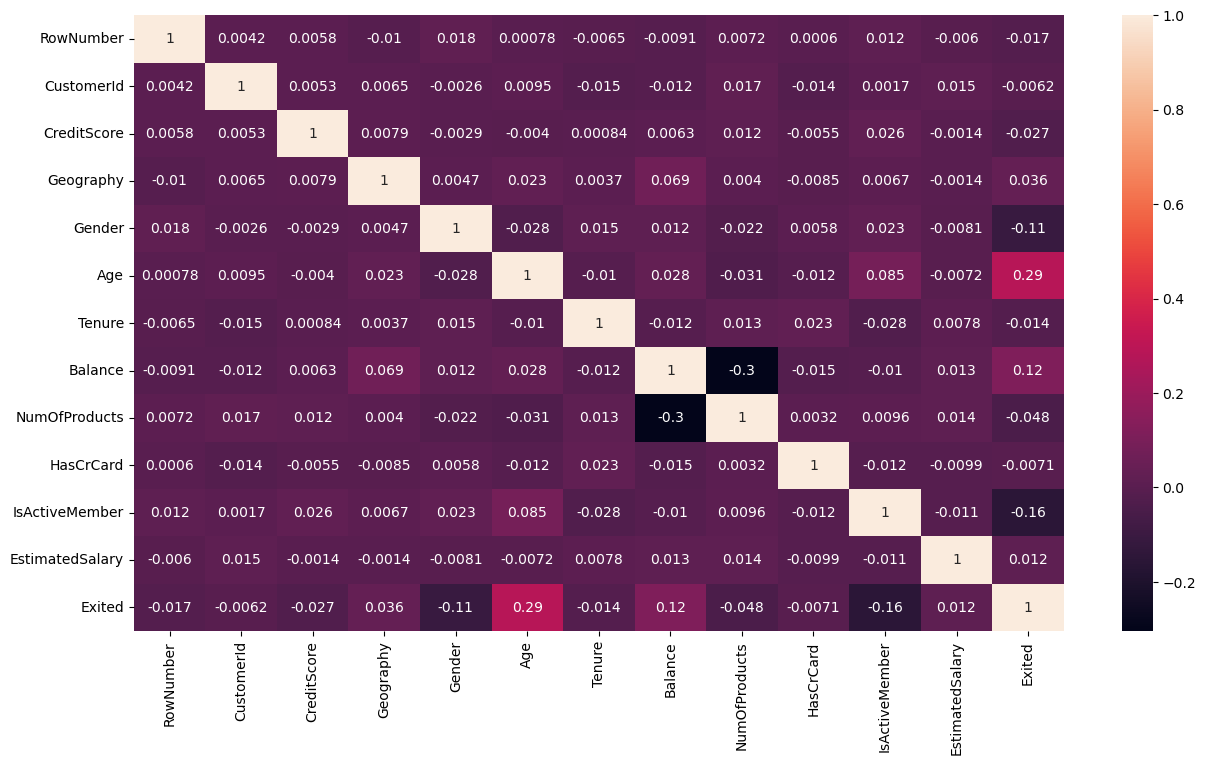

In [27]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=[15,8])
sns.heatmap(data.corr(),annot=True)
plt.show

In [30]:
from sklearn.model_selection import train_test_split
j_train,j_test,a_train,a_test=train_test_split(J,A,test_size=0.3,random_state=42)
print("Shape of j_train : ",j_train.shape)
print("Shape of j_test : ",j_test.shape)
print("Shape of a_train : ",a_train.shape)
print("Shape of a_test : ",a_test.shape)

Shape of j_train :  (7000, 9)
Shape of j_test :  (3000, 9)
Shape of a_train :  (7000,)
Shape of a_test :  (3000,)


In [33]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(class_weight='balanced')
lr.fit(j_train,a_train)

LogisticRegression(class_weight='balanced')

In [34]:
# Model prediction and evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,f1_score,confusion_matrix
import numpy as np
test_score=lr.score(j_test,a_test)
train_score=lr.score(j_train,a_train)
print("Testing score: ",test_score)
print("Train score: ",train_score)

Testing score:  0.662
Train score:  0.6798571428571428


In [35]:
a_pre=lr.predict(j_test)
a_pre

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [37]:
r2s=r2_score(a_test,a_pre)
mae=mean_absolute_error(a_test,a_pre)
mse=mean_absolute_error(a_test,a_pre)
rmse=np.sqrt(mse)
accsc=accuracy_score(a_test,a_pre)
f1s=f1_score(a_test,a_pre)
cm=confusion_matrix(a_test,a_pre)
print("R2 score : ",r2s)
print("Mean absolute error : ",mae)
print("Mean Squared error : ",mse)
print("Root Mean Squared error :",rmse)
print("Accuracy score : ",f1s)
print("Confusion Matrix : \n",cm)

R2 score :  -1.1560033566179801
Mean absolute error :  0.338
Mean Squared error :  0.338
Root Mean Squared error : 0.5813776741499453
Accuracy score :  0.4245175936435868
Confusion Matrix : 
 [[1612  804]
 [ 210  374]]


In [38]:
# Model building
from sklearn.model_selection import train_test_split
j_train,j_test,a_train,a_test=train_test_split(J,A, test_size=0.3,random_state=42)
print("Shape of j_train:",j_train.shape)
print("Shape of j_test:",j_test.shape)
print("Shape of a_train:",a_train.shape)
print("Shape of a_train:",a_test.shape)

Shape of j_train: (7000, 9)
Shape of j_test: (3000, 9)
Shape of a_train: (7000,)
Shape of a_train: (3000,)


In [39]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(class_weight='balanced')
RFC.fit(j_train,a_train)

RandomForestClassifier(class_weight='balanced')

In [40]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,f1_score,confusion_matrix
import numpy as np
test_score=RFC.score(j_test,a_test)
train_score=RFC.score(j_train,a_train)
print("Testing score: ",test_score)
print("Train score: ",train_score)

Testing score:  0.865
Train score:  1.0


In [41]:
a_pre=RFC.predict(j_test)
a_pre

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
a_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
r2s=r2_score(a_test,a_pre)
mae=mean_absolute_error(a_test,a_pre)
mse=mean_absolute_error(a_test,a_pre)
rmse=np.sqrt(mse)
accsc=accuracy_score(a_test,a_pre)
f1s=f1_score(a_test,a_pre)
cm=confusion_matrix(a_test,a_pre)
print("R2 score : ",r2s)
print("Mean absolute error : ",mae)
print("Mean Squared error : ",mse)
print("Root Mean Squared error :",rmse)
print("Accuracy score : ",accsc)
print("F1 score: " ,f1s)
print("Confusion Matrix : \n",cm)

R2 score :  0.1941565363331218
Mean absolute error :  0.12633333333333333
Mean Squared error :  0.12633333333333333
Root Mean Squared error : 0.35543400700176864
Accuracy score :  0.8736666666666667
F1 score:  0.5902702702702702
Confusion Matrix : 
 [[2348   68]
 [ 311  273]]


In [44]:
# Model Building 
from sklearn.model_selection import train_test_split
j_train,j_test,a_train,a_test=train_test_split(J,A, test_size=0.3,random_state=42)
print("Shape of j_train:",j_train.shape)
print("Shape of j_test:",j_test.shape)
print("Shape of a_train:",a_train.shape)
print("Shape of a_train:",a_test.shape)

Shape of j_train: (7000, 9)
Shape of j_test: (3000, 9)
Shape of a_train: (7000,)
Shape of a_train: (3000,)


In [46]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(j_train,a_train)

GradientBoostingClassifier()

In [47]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,f1_score,confusion_matrix
import numpy as np
test_score=GBC.score(j_test,a_test)
train_score=GBC.score(j_train,a_train)
print("Testing score: ",test_score)
print("Train score: ",train_score)

Testing score:  0.8736666666666667
Train score:  0.8712857142857143


In [48]:
a_pre=GBC.predict(j_test)
a_pre

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
r2s=r2_score(a_test,a_pre)
mae=mean_absolute_error(a_test,a_pre)
mse=mean_absolute_error(a_test,a_pre)
rmse=np.sqrt(mse)
accsc=accuracy_score(a_test,a_pre)
f1s=f1_score(a_test,a_pre)
cm=confusion_matrix(a_test,a_pre)
print("R2 score : ",r2s)
print("Mean absolute error : ",mae)
print("Mean Squared error : ",mse)
print("Root Mean Squared error :",rmse)
print("Accuracy score : ",accsc)
print("F1 score: " ,f1s)
print("Confusion Matrix : \n",cm)

R2 score :  0.1941565363331218
Mean absolute error :  0.12633333333333333
Mean Squared error :  0.12633333333333333
Root Mean Squared error : 0.35543400700176864
Accuracy score :  0.8736666666666667
F1 score:  0.5902702702702702
Confusion Matrix : 
 [[2348   68]
 [ 311  273]]


In [52]:
# Model testing
j_test.iloc[0]

CreditScore          596.00
Geography              1.00
Age                   32.00
Tenure                 3.00
Balance            96709.07
NumOfProducts          2.00
HasCrCard              0.00
IsActiveMember         0.00
EstimatedSalary    41788.37
Name: 6252, dtype: float64